**Name : Trakshay Balagotra**

**Contact Number : +91 8308103278**

**Mail ID : Trakshay.Balagotra@outlook.com**

**Forage Quantium Data Analytics **
**Task 1 : Data Preparation and Customer Analytics**

# 1. Importing the necessary dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from IPython.display import IFrame, display


# 2. Reading the datasets using the pandas module

In [5]:
transaction_df = pd.read_excel("/content/sample_data/QVI_transaction_data.xlsx")
customer_df = pd.read_csv("/content/sample_data/QVI_purchase_behaviour.csv")

In [13]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



From above we can infer that there are no Blank/NULL VALUES in both the datasets
# **3. Exploring the Purchase Behavior Dataset**

In [17]:
customer_df.LIFESTAGE.value_counts()

,count
LIFESTAGE,
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [18]:
customer_df.PREMIUM_CUSTOMER.value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


In [19]:
lifestage_type_counts = customer_df['LIFESTAGE'].value_counts()

# Define custom colors for each lifestage type
colors = px.colors.qualitative.Set1[:len(lifestage_type_counts)]

# Create a bar chart using Plotly Express with different colors
fig = px.bar(
    x=lifestage_type_counts.index,
    y=lifestage_type_counts.values,
    labels={'y': 'Count', 'x': 'LifeStage'},
    color=lifestage_type_counts.index,  # Use lifestage type as color
    color_discrete_map={ctype: color for ctype, color in zip(lifestage_type_counts.index, colors)},  # Assign custom colors
    title='Lifestage Type Distribution',
)
for i, count in enumerate(lifestage_type_counts.values):
    fig.add_annotation(
        x=lifestage_type_counts.index[i],
        y=count,
        text=str(count),
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-30,
    )

# Add a legend
fig.update_layout(legend=dict(title=dict(text='Legend')))

# Show the plot
fig.show()

In [20]:
labels = customer_df['LIFESTAGE'].value_counts().index
values = customer_df['LIFESTAGE'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Set layout properties
fig.update_layout(title='Pie Chart LifeStage')

# Show the plot
fig.show()

In [21]:
premium_type_counts = customer_df['PREMIUM_CUSTOMER'].value_counts()

# Define custom colors for each premium type
colors = px.colors.qualitative.Set1[:len(premium_type_counts)]

# Create a bar chart using Plotly Express with different colors
fig = px.bar(
    x=premium_type_counts.index,
    y=premium_type_counts.values,
    labels={'y': 'Count', 'x': 'Type of Customer'},
    color=premium_type_counts.index,  # Use premium type as color
    color_discrete_map={ctype: color for ctype, color in zip(premium_type_counts.index, colors)},  # Assign custom colors
    title='Customer Type Distribution',
)
for i, count in enumerate(premium_type_counts.values):
    fig.add_annotation(
        x=premium_type_counts.index[i],
        y=count,
        text=str(count),
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-30,
    )

# Add a legend
fig.update_layout(legend=dict(title=dict(text='Legend')))

# Show the plot
fig.show()

In [22]:
labels = customer_df['PREMIUM_CUSTOMER'].value_counts().index
values = customer_df['PREMIUM_CUSTOMER'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Set layout properties
fig.update_layout(title='Pie Chart Customer Type')

# Show the plot
fig.show()

# 4. Exploring the Transactions Dataset

In [24]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [26]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# 5. Combining both the datasets on basis of common column named 'LYLTY_CARD_NBR'

In [28]:
merged_data = pd.merge(customer_df, transaction_df, on='LYLTY_CARD_NBR', how='inner')

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [30]:
merged_data.LIFESTAGE.value_counts()

,count
LIFESTAGE,
OLDER SINGLES/COUPLES,54479
RETIREES,49763
OLDER FAMILIES,48596
YOUNG FAMILIES,43592
YOUNG SINGLES/COUPLES,36377
MIDAGE SINGLES/COUPLES,25110
NEW FAMILIES,6919


In [31]:
merged_data.PREMIUM_CUSTOMER.value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,101988
Budget,93157
Premium,69691


In [32]:
lifestage_type_counts = merged_data['LIFESTAGE'].value_counts()

# Define custom colors for each lifestage type
colors = px.colors.qualitative.Set1[:len(lifestage_type_counts)]

# Create a bar chart using Plotly Express with different colors
fig = px.bar(
    x=lifestage_type_counts.index,
    y=lifestage_type_counts.values,
    labels={'y': 'Count', 'x': 'LifeStage'},
    color=lifestage_type_counts.index,  # Use lifestage type as color
    color_discrete_map={ctype: color for ctype, color in zip(lifestage_type_counts.index, colors)},  # Assign custom colors
    title='Merged Data Lifestage Type Distribution',
)
for i, count in enumerate(lifestage_type_counts.values):
    fig.add_annotation(
        x=lifestage_type_counts.index[i],
        y=count,
        text=str(count),
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-30,
    )

# Add a legend
fig.update_layout(legend=dict(title=dict(text='Legend')))

# Show the plot
fig.show()

In [33]:
labels = merged_data['LIFESTAGE'].value_counts().index
values = merged_data['LIFESTAGE'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Set layout properties
fig.update_layout(title='Pie Chart Merged Data LifeStage')

# Show the plot
fig.show()

In [34]:
premium_type_counts = merged_data['PREMIUM_CUSTOMER'].value_counts()

# Define custom colors for each premium type
colors = px.colors.qualitative.Set1[:len(premium_type_counts)]

# Create a bar chart using Plotly Express with different colors
fig = px.bar(
    x=premium_type_counts.index,
    y=premium_type_counts.values,
    labels={'y': 'Count', 'x': 'Type of Customer'},
    color=premium_type_counts.index,  # Use premium type as color
    color_discrete_map={ctype: color for ctype, color in zip(premium_type_counts.index, colors)},  # Assign custom colors
    title='Merged Data Customer Type Distribution',
)
for i, count in enumerate(premium_type_counts.values):
    fig.add_annotation(
        x=premium_type_counts.index[i],
        y=count,
        text=str(count),
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-30,
    )

# Add a legend
fig.update_layout(legend=dict(title=dict(text='Legend')))

# Show the plot
fig.show()

In [35]:
labels = merged_data['PREMIUM_CUSTOMER'].value_counts().index
values = merged_data['PREMIUM_CUSTOMER'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Set layout properties
fig.update_layout(title='Pie Chart Merged Data Customer Type')

# Show the plot
fig.show()

In [38]:
#Formating the DATE COLUMN from Microsoft Excel format to Normal Format
merged_data['DATE_NRML'] = pd.to_datetime(merged_data['DATE'], origin='1900-01-01', unit='D')

In [43]:
#Extracting Year from DATE_NRML column
merged_data['Year'] = merged_data['DATE_NRML'].dt.year

In [44]:
#Extracting Month_name from DATE_NRML column
merged_data['Month_Name'] = merged_data['DATE_NRML'].dt.strftime('%B')

In [45]:
#Extracting Month_name and Year from DATE_NRML column
merged_data['Month_Year'] = merged_data['DATE_NRML'].dt.strftime('%B %Y')

In [46]:
#Extracting Week Number from DATE_NRML column
merged_data['Week_Number'] = merged_data['DATE_NRML'].dt.isocalendar().week

In [47]:
##Extracting Quater from DATE_NRML column
merged_data['Quarter'] = merged_data['DATE_NRML'].dt.quarter

In [48]:
#Extracting Quater and Year from DATE_NRML column
merged_data['Quarter_Year'] = merged_data['DATE_NRML'].dt.to_period('Q')

In [49]:
#Extracting WEEKDAY from DATE_NRML column
merged_data['Weekday'] = merged_data['DATE_NRML'].dt.day_name()

In [50]:
merged_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_NRML,Year,Month_Name,Month_Year,Week_Number,Quarter,Quarter_Year,Weekday
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,October,October 2018,42,4,2018Q4,Friday
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-18,2018,September,September 2018,38,3,2018Q3,Tuesday
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-09,2019,March,March 2019,10,1,2019Q1,Saturday
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-10,2019,March,March 2019,10,1,2019Q1,Sunday
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-04,2018,November,November 2018,44,4,2018Q4,Sunday
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,43462,1,6,86,Cheetos Puffs 165g,1,2.8,2018-12-30,2018,December,December 2018,52,4,2018Q4,Sunday
6,1007,YOUNG SINGLES/COUPLES,Budget,43438,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,2018-12-06,2018,December,December 2018,49,4,2018Q4,Thursday
7,1007,YOUNG SINGLES/COUPLES,Budget,43439,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,2018-12-07,2018,December,December 2018,49,4,2018Q4,Friday
8,1009,NEW FAMILIES,Premium,43424,1,9,20,Doritos Cheese Supreme 330g,1,5.7,2018-11-22,2018,November,November 2018,47,4,2018Q4,Thursday
9,1010,YOUNG SINGLES/COUPLES,Mainstream,43352,1,10,51,Doritos Mexicana 170g,2,8.8,2018-09-11,2018,September,September 2018,37,3,2018Q3,Tuesday


In [51]:
merged_data.to_csv('Merged_data.csv')
#Saving the merged Dataset

In [52]:
merged_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_NRML,Year,Month_Name,Month_Year,Week_Number,Quarter,Quarter_Year,Weekday
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,October,October 2018,42,4,2018Q4,Friday
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-18,2018,September,September 2018,38,3,2018Q3,Tuesday
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-09,2019,March,March 2019,10,1,2019Q1,Saturday
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-10,2019,March,March 2019,10,1,2019Q1,Sunday
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-04,2018,November,November 2018,44,4,2018Q4,Sunday
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,43462,1,6,86,Cheetos Puffs 165g,1,2.8,2018-12-30,2018,December,December 2018,52,4,2018Q4,Sunday
6,1007,YOUNG SINGLES/COUPLES,Budget,43438,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,2018-12-06,2018,December,December 2018,49,4,2018Q4,Thursday
7,1007,YOUNG SINGLES/COUPLES,Budget,43439,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,2018-12-07,2018,December,December 2018,49,4,2018Q4,Friday
8,1009,NEW FAMILIES,Premium,43424,1,9,20,Doritos Cheese Supreme 330g,1,5.7,2018-11-22,2018,November,November 2018,47,4,2018Q4,Thursday
9,1010,YOUNG SINGLES/COUPLES,Mainstream,43352,1,10,51,Doritos Mexicana 170g,2,8.8,2018-09-11,2018,September,September 2018,37,3,2018Q3,Tuesday


In [53]:
counts = merged_data.PROD_NAME.value_counts().head(20)


colors = px.colors.qualitative.Set1[:len(counts)]

# Create a bar chart using Plotly Express with different colors
fig = px.bar(
    y=counts.index,
    x=counts.values,
    orientation='h',
    labels={'x': 'Count', 'y':'Product Name'},
    color=counts.index,
    color_discrete_map={ctype: color for ctype, color in zip(counts.index, colors)},  # Assign custom colors
    title='Top - 20 Product Names (Ascending Order)',
)
for i, count in enumerate(counts.values):
    fig.add_annotation(
        y=counts.index[i],
        x=count,
        text=str(count),
        showarrow=False,
        arrowhead=5,
        ax=0,
        ay=-30,
    )

# Add a legend
fig.update_layout(legend=dict(title=dict(text='Legend')), height = 1000)

# Show the plot
fig.show()


In [54]:
merged_data.PROD_QTY.value_counts()

,count
PROD_QTY,
2,236039
1,27518
5,450
3,430
4,397
200,2


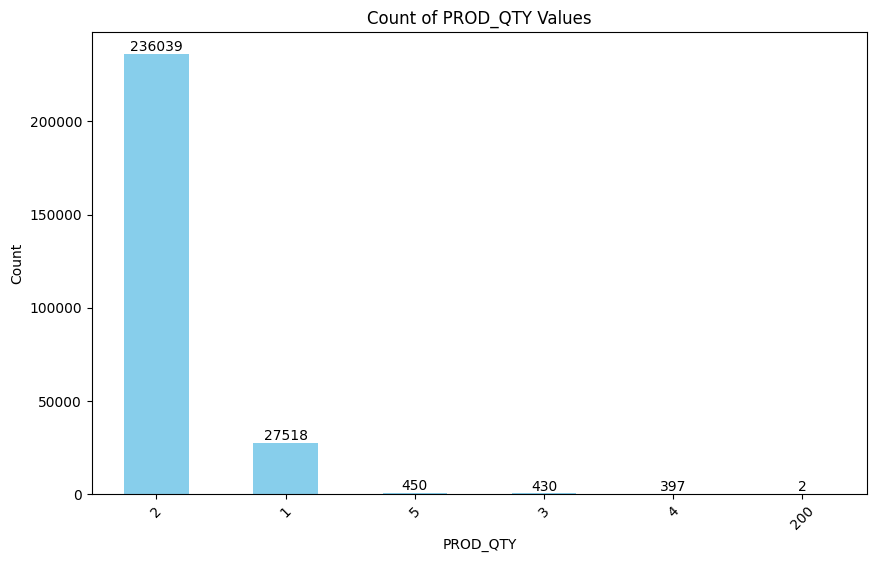

In [55]:
import matplotlib.pyplot as plt
prod_qty_counts = merged_data['PROD_QTY'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))
ax = prod_qty_counts.plot(kind='bar', color='skyblue')
plt.title('Count of PROD_QTY Values')
plt.xlabel('PROD_QTY')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, count in enumerate(prod_qty_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')


# Display the plot
plt.show()


In [56]:
merged_data.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_NRML,Year,Month_Name,Month_Year,Week_Number,Quarter,Quarter_Year,Weekday
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,October,October 2018,42,4,2018Q4,Friday
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-18,2018,September,September 2018,38,3,2018Q3,Tuesday
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-09,2019,March,March 2019,10,1,2019Q1,Saturday
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-10,2019,March,March 2019,10,1,2019Q1,Sunday
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-04,2018,November,November 2018,44,4,2018Q4,Sunday


In [57]:
merged_data.Year.value_counts()

,count
Year,
2019,132600
2018,132236


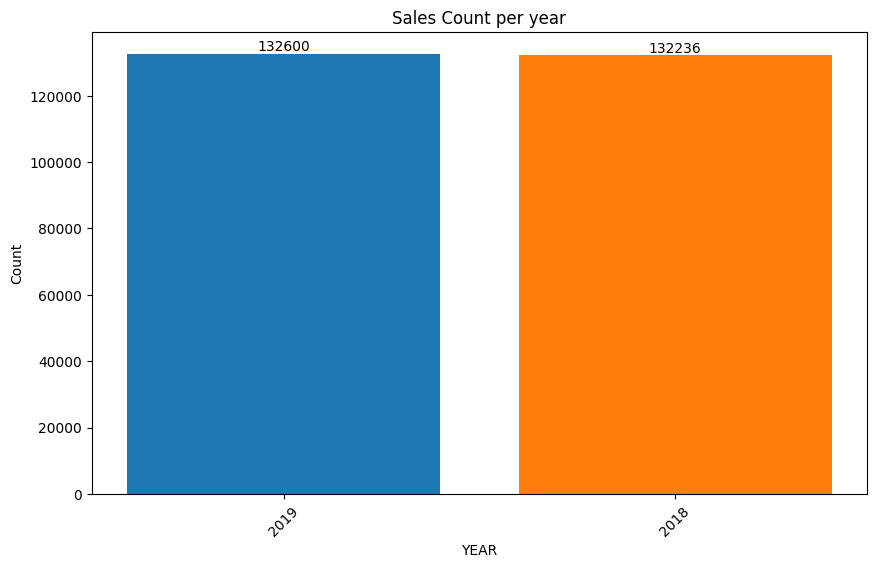

In [58]:
counts = merged_data['Year'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))

for i, (value, count) in enumerate(counts.items()):
    plt.bar(i, count)
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Sales Count per year')
plt.xlabel('YEAR')
plt.ylabel('Count')
plt.xticks(range(len(counts)), counts.index, rotation=45)

# Display the plot
plt.show()


In [59]:
merged_data.Month_Year.value_counts()

,count
Month_Year,
December 2018,22853
March 2019,22628
August 2018,22488
May 2019,22404
October 2018,22342
January 2019,22143
November 2018,21798
June 2019,21797
April 2019,21727


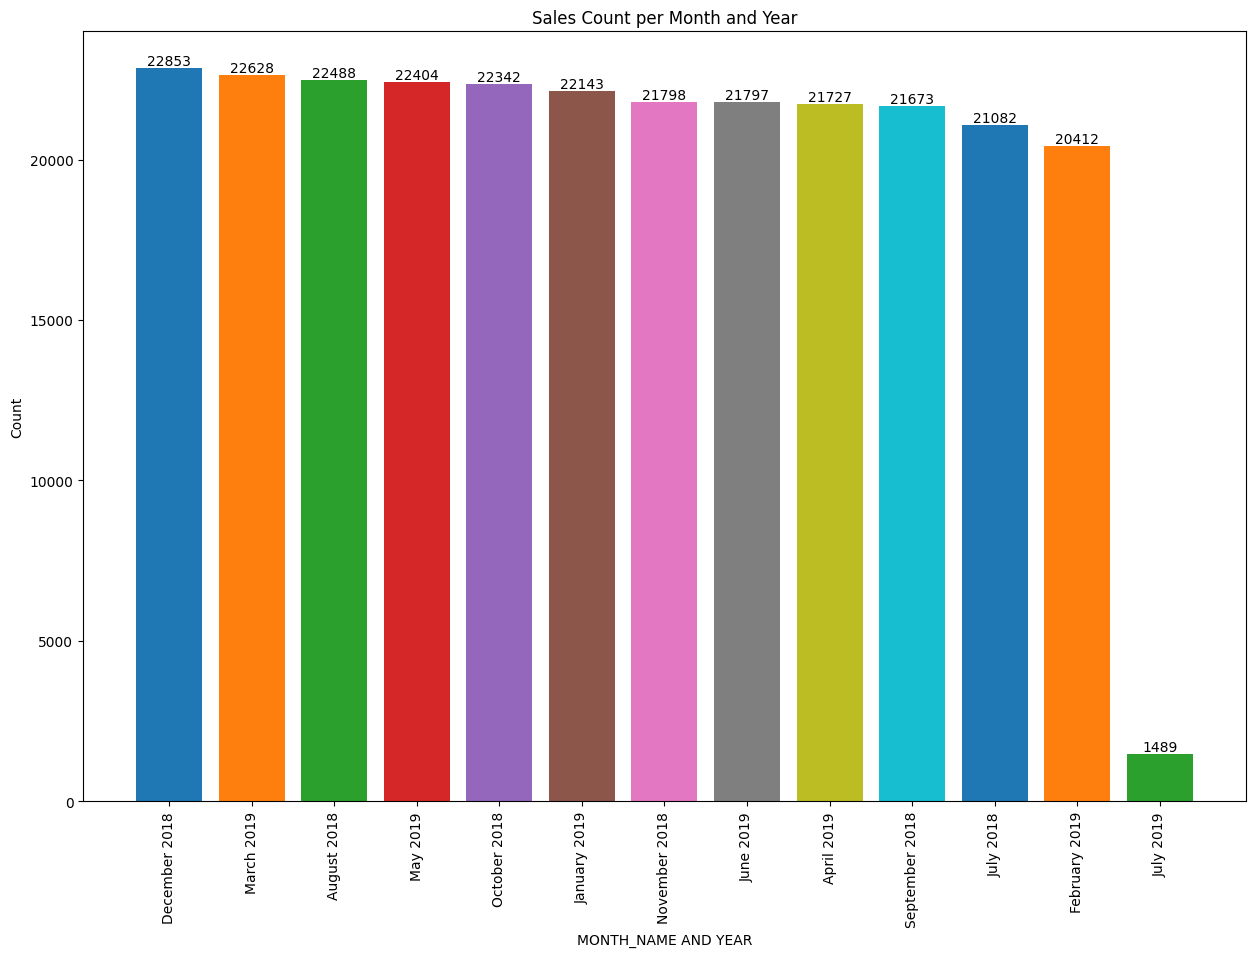

In [60]:
counts = merged_data['Month_Year'].value_counts()

# Plotting the counts
plt.figure(figsize=(15, 10))

for i, (value, count) in enumerate(counts.items()):
    plt.bar(i, count)
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Sales Count per Month and Year')
plt.xlabel('MONTH_NAME AND YEAR')
plt.ylabel('Count')
plt.xticks(range(len(counts)), counts.index, rotation=90)

# Display the plot
plt.show()

In [61]:
merged_data['Quarter_Year'].value_counts()

,count
Quarter_Year,
2018Q4,66993
2019Q2,65928
2018Q3,65243
2019Q1,65183
2019Q3,1489


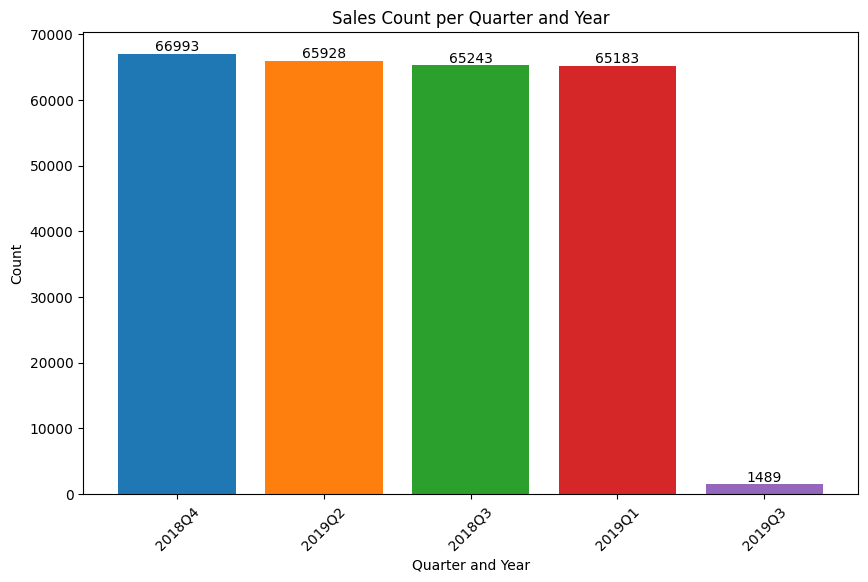

In [62]:
counts = merged_data['Quarter_Year'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))

for i, (value, count) in enumerate(counts.items()):
    plt.bar(i, count)
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Sales Count per Quarter and Year')
plt.xlabel('Quarter and Year')
plt.ylabel('Count')
plt.xticks(range(len(counts)), counts.index, rotation=45)

# Display the plot
plt.show()

In [63]:
merged_data['Quarter'].value_counts()

,count
Quarter,
4,66993
3,66732
2,65928
1,65183


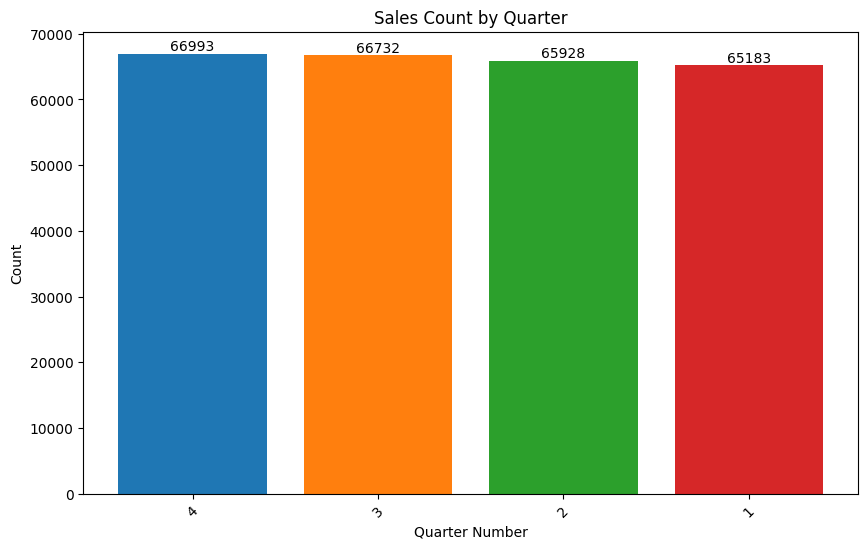

In [64]:
counts = merged_data['Quarter'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))

for i, (value, count) in enumerate(counts.items()):
    plt.bar(i, count)
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Sales Count by Quarter')
plt.xlabel('Quarter Number')
plt.ylabel('Count')
plt.xticks(range(len(counts)), counts.index, rotation=45)

# Display the plot
plt.show()


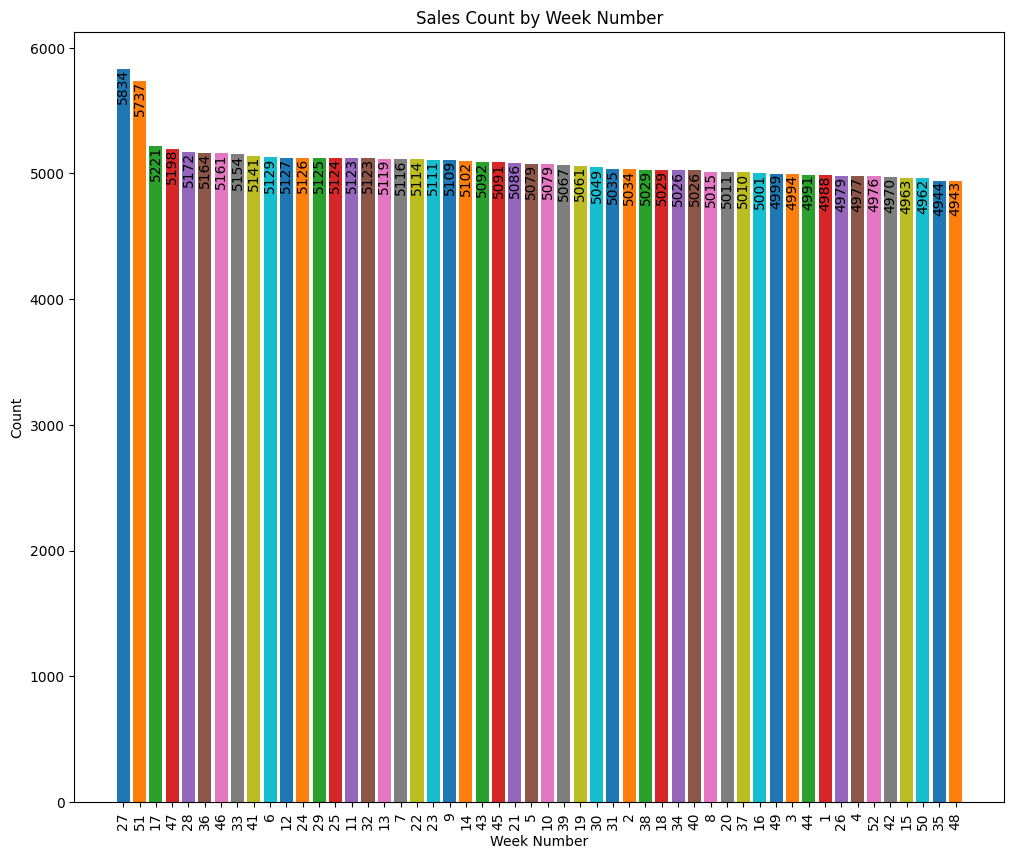

In [65]:
counts = merged_data['Week_Number'].value_counts()

# Plotting the counts
plt.figure(figsize=(12, 10))

for i, (value, count) in enumerate(counts.items()):
    plt.bar(i, count)
    plt.text(i, count + 0.1, str(count), ha='center', va='top', rotation = 90)

plt.title('Sales Count by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.xticks(range(len(counts)), counts.index, rotation=90)

# Display the plot
plt.show()

In [66]:
merged_data['Weekday'].value_counts()

,count
Weekday,
Tuesday,38718
Sunday,38208
Friday,37979
Monday,37812
Wednesday,37605
Saturday,37375
Thursday,37139


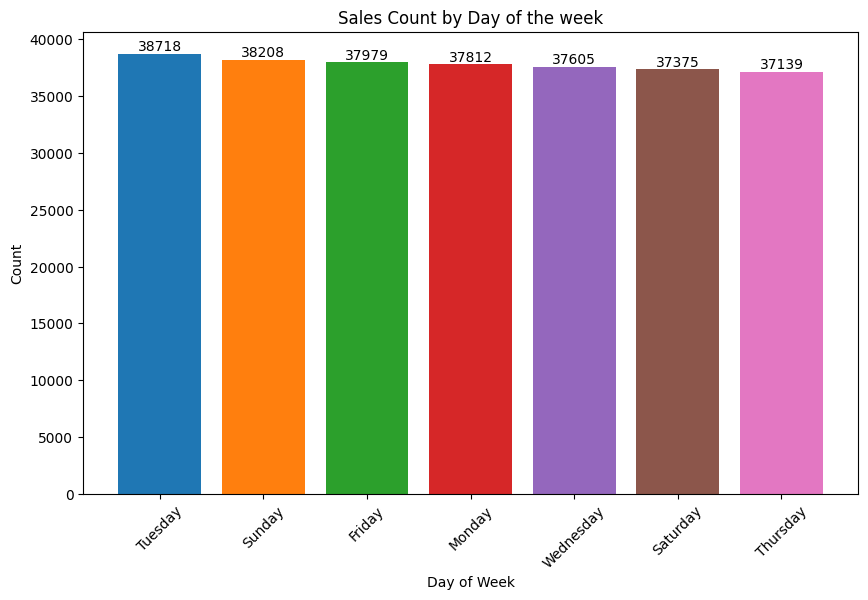

In [67]:
counts = merged_data['Weekday'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))

for i, (value, count) in enumerate(counts.items()):
    plt.bar(i, count)
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Sales Count by Day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(range(len(counts)), counts.index, rotation=45)

# Display the plot
plt.show()

In [68]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  int64         
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  int64         
 4   STORE_NBR         264836 non-null  int64         
 5   TXN_ID            264836 non-null  int64         
 6   PROD_NBR          264836 non-null  int64         
 7   PROD_NAME         264836 non-null  object        
 8   PROD_QTY          264836 non-null  int64         
 9   TOT_SALES         264836 non-null  float64       
 10  DATE_NRML         264836 non-null  datetime64[ns]
 11  Year              264836 non-null  int32         
 12  Month_Name        264836 non-null  object        
 13  Month_Year        264836 non-null  object        
 14  Week

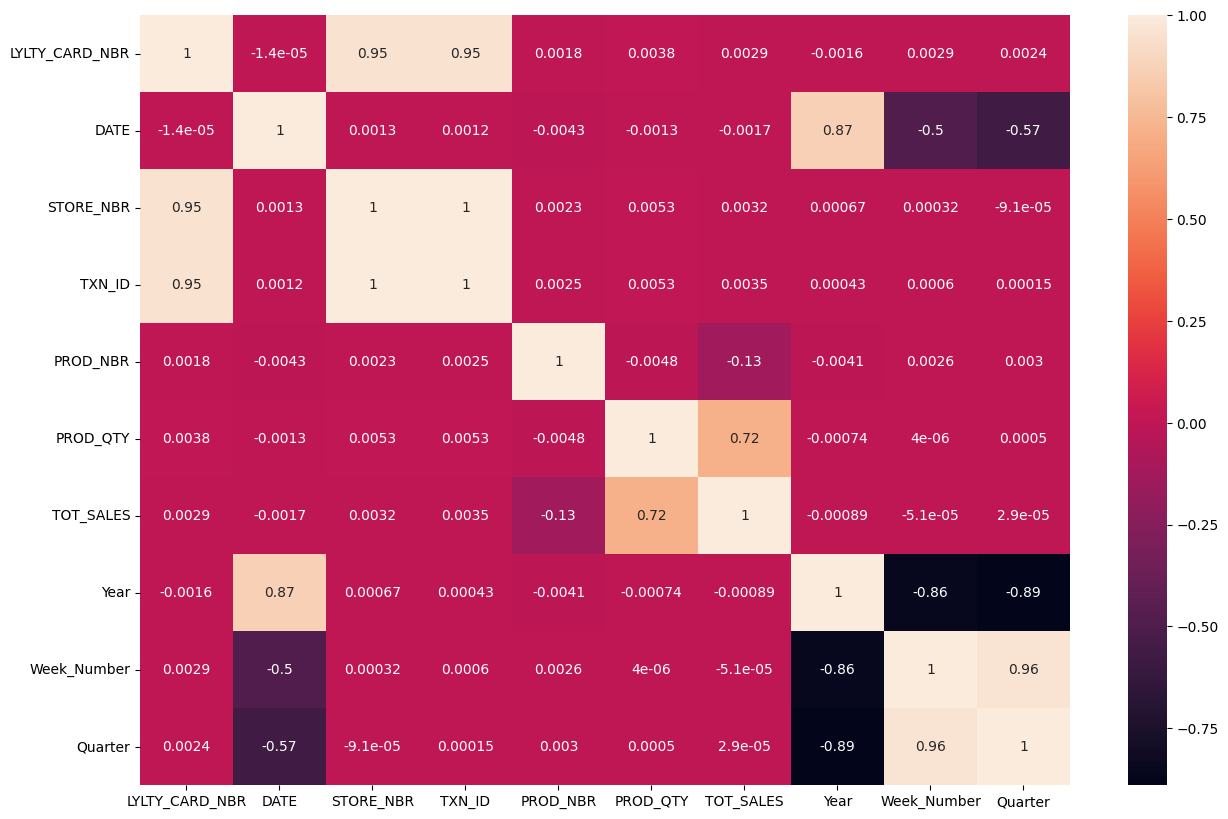

In [71]:
# Assuming merged_data is your DataFrame

# Select only numerical features for correlation calculation
numerical_features = merged_data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show() # Added to display the plot

In [72]:
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_NRML,Year,Month_Name,Month_Year,Week_Number,Quarter,Quarter_Year,Weekday
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,October,October 2018,42,4,2018Q4,Friday
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-18,2018,September,September 2018,38,3,2018Q3,Tuesday
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-09,2019,March,March 2019,10,1,2019Q1,Saturday
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-10,2019,March,March 2019,10,1,2019Q1,Sunday
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-04,2018,November,November 2018,44,4,2018Q4,Sunday
